# 🚗 Automobile Company Insurance Complaints

## Requirements:
Your task is to clean and explore a dataset for automobile insurance company investors that describes trends in insurance complaint ranking data. They are particularly interested in learning about various automobile insurance companies and their trends in complaints.

The data is from the New York State Department of Financial Services (DFS):

> "The DFS ranks automobile insurance companies doing business in New York State based on the number of consumer complaints upheld against them as a percentage of their total business over a two-year period. Complaints typically involve issues like delays in the payment of no-fault claims and nonrenewal of policies. Insurers with the fewest upheld complaints per million dollars of premiums appear at the top of the list. Those with the highest complaint ratios are ranked at the bottom." - ny.gov

## Data Dictionary:
| Column Name                     | Data Type | Description                                                                                              |
|---------------------------------|-----------|----------------------------------------------------------------------------------------------------------|
| **NAIC**                        | Int       | National Association of Insurance Commissioners ID Number                                                |
| **Company Name**                | Object    | Insurance Company Name                                                                                   |
| **Ratio**                       | Float     | Complaint Ratio is the quotient of the number of upheld complaints divided by the average of a company's current and prior year premiums written directly in New York State |
| **Upheld Complaints**           | Float     | Number of "upheld" complaint cases                                                                        |
| **Question of Fact Complaints** | Int       | Number of "questions of fact" cases                                                                       |
| **Not Upheld Complaints**       | Int       | Number of "not upheld or withdrawn" cases                                                                 |
| **Total Complaints**            | Int       | Sum of "Upheld Complaints", "Question of Fact Complaints", and "Not Upheld Complaints"                    |
| **Premiums Written (in Millions)** | Float     | Average of a company's current and prior year premiums written directly in New York State (in millions of dollars) |
| **Rank**                        | Int       | Number corresponding to a company's location on the report listing                                        |
| **Filing Year**                 | Int       | Represents the year in which the complaint filing was closed                                              |

## Steps for Data Cleaning and Preparation:

1. **Identify and address any duplicate values.**
2. **Ensure all columns match the data types listed in the data dictionary.**
3. **Identify and address any inconsistencies in categorical values (e.g., cat, Cat, cats).**
4. **Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.**
5. **Identify and address any inappropriate or unusual data points (e.g., age cannot be 325).**

## Data Exploration:

### Univariate Visualizations:
- Create two different types of univariate visualizations. Each visualization must include a brief interpretation within the code file.

### Multivariate Visualizations:
- Create two different types of multivariate visualizations. Each visualization must include a brief interpretation within the code file.

## Markdown Excellence:
- Ensure that your markdown is top-notch with icons and photos to enhance readability and engagement.


# ________________________________________________________________________________________

# 🧼 Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'auto-insurance-complaint-rankings.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1)

df.head(10)

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016
5,43478,Utica National Insurance Company of Texas,0.0,0.0,4,4,8,43.693,6,2016
6,16233,Erie Insurance Company of New York,0.0,0.0,5,2,7,35.072,7,2016
7,42919,Progressive Northwestern Insurance Company,0.0,0.0,0,4,4,32.511,8,2016
8,34460,Maidstone Insurance Company,0.0,0.0,4,11,Fifteen,30.867,9,2016
9,36145,Travelers Personal Security Insurance Company,0.0,0.0,1,0,1,30.397,10,2016


In [2]:
num_columns = df.shape[0]
print(f'The number of columns: {num_columns}')

#number of features (rows)
num_rows = df.shape[1]
print(f'The number of rows: {num_rows}')

The number of columns: 1363
The number of rows: 10


## 🧐 Checking duplicated values and missing data

In [3]:
#check for duplicates
duplicates = df.duplicated().sum()
print(f'The number of duplicated rows are: {duplicates}')

misvals = df.isnull().sum()
print(f'Number of missing values:')
print(misvals)

The number of duplicated rows are: 5
Number of missing values:
NAIC                               0
Company Name                       0
Ratio                              0
Upheld Complaints                 25
 Question of Fact Complaints       0
Not Upheld Complaints              0
Total Complaints                   0
Premiums Written (in Millions)     0
Rank                               0
Filing Year                        0
dtype: int64


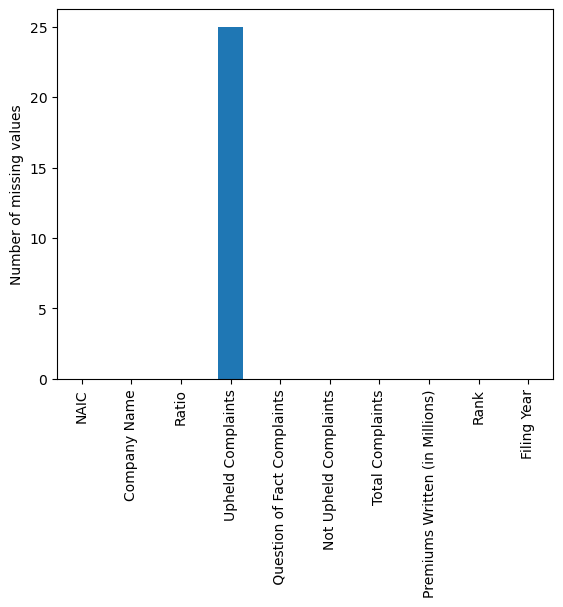

In [4]:
# Visualizing missing data
df.isnull().sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.show()

In [5]:
#drop duplicate information
df.drop_duplicates(inplace = True)

#check for duplicates
print(f'\nNumber of duplicated rows after dropping: {df.duplicated().sum()}')



Number of duplicated rows after dropping: 0


### Removing spaces before the column names

In [6]:
df.columns = [col.strip() for col in df.columns]
print(df.columns)

Index(['NAIC', 'Company Name', 'Ratio', 'Upheld Complaints',
       'Question of Fact Complaints', 'Not Upheld Complaints',
       'Total Complaints', 'Premiums Written (in Millions)', 'Rank',
       'Filing Year'],
      dtype='object')


## 🛠️ Checking and Correcting Data Types and Categorical Inconsistencies

### ❌ Checking for wrong data types

In [7]:
data_types = df.dtypes
print('\nData types of each feature:')
print(data_types)


Data types of each feature:
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints        object
Not Upheld Complaints               int64
Total Complaints                   object
Premiums Written (in Millions)     object
Rank                                int64
Filing Year                         int64
dtype: object


### Columns that has the wrong data type
1. Question of Fact Complaints should be `integer`
2. Total Complaints should be `integer`
3. Premiums Written (in Millions) should be `float`


### 🕵️ Feature Exploration

In [8]:
def check_column_vals(df):
    print('Checking all columns for issues')

    #check Company name
    print('\nUnique values in Company name column')
    print(df['Company Name'].unique())

    #check Ratio
    print('\nUnique values in Ratio column')
    print(df['Ratio'].unique())

    #check unheld complaints
    print('\nUnique values in Upheld Complaints column')
    print(df['Upheld Complaints'].unique())

    #check question of fact complaints
    print('\nUnique values in Question of Fact Complaints column')
    print(df['Question of Fact Complaints'].unique())

    #check Not upheld complaints
    print('\nUnique values in Not Upheld Complaints column')
    print(df['Not Upheld Complaints'].unique())

    #check total complaints
    print('\nUnique values in Total Complaints column')
    print(df['Total Complaints'].unique())

    #check premiums written (in Millions)
    print('\nUnique values in Premiums Written (in Millions) column')
    print(df['Premiums Written (in Millions)'].unique())

    #check rank
    print('\nUnique values in Rank column')
    print(df['Rank'].unique())

    #check filing year
    print('\nUnique values in Filing Year column')
    print(df['Filing Year'].unique())

check_column_vals(df)

Checking all columns for issues

Unique values in Company name column
['Progressive Specialty Insurance Company'
 'Amica Mutual Insurance Company'
 'Nationwide Insurance Company of America'
 'Preferred Mutual Insurance Company' 'Chubb National Insurance Company'
 'Utica National Insurance Company of Texas'
 'Erie Insurance Company of New York'
 'Progressive Northwestern Insurance Company'
 'Maidstone Insurance Company'
 'Travelers Personal Security Insurance Company'
 'Esurance Insurance Company' 'Integon National Insurance Company'
 'Encompass Home and Auto Insurance Company'
 'Esurance Property and Casualty Insurance Company'
 'Farm Family Casualty Insurance Company'
 'Bankers Standard Insurance Company'
 'Foremost Insurance Company Grand Rapids, Michigan'
 'Travelers Commercial Insurance Company'
 'Great Northern Insurance Company' 'Essentia Insurance Company'
 'Merchants Preferred Insurance Company'
 '21st Century National Insurance Company'
 'Hartford Insurance Company of the Midw

### ❌ Values that needs to be corrected
- Company = '#Allstate Indemnity Company', 'A! Central Insurance Company', 
- Question of Fact Complaints = '46_'
- Total Complaints = 'Fifteen'
- Premiums Written (in Millions) = '2.521.0'
- Filing year = '3016'

## 🕵️‍♂️💡Identifying and filling in missing values 

In [9]:
# Fill missing Upheld Complaints values
df.fillna({'Upheld Complaints': 0}, inplace = True)
df.isna().sum()

NAIC                              0
Company Name                      0
Ratio                             0
Upheld Complaints                 0
Question of Fact Complaints       0
Not Upheld Complaints             0
Total Complaints                  0
Premiums Written (in Millions)    0
Rank                              0
Filing Year                       0
dtype: int64

## ✅ Correcting Data types & Values

In [10]:
#Correcting Company names
company_name_correction = {
    '#Allstate Indemnity Company':'Allstate Indemnity Company',
    'A! Central Insurance Company':'A. Central Insurance Company'
}
df['Company Name'] = df['Company Name'].replace(company_name_correction)

print('Unique values in Company Name column:')
print(df['Company Name'].unique())

Unique values in Company Name column:
['Progressive Specialty Insurance Company'
 'Amica Mutual Insurance Company'
 'Nationwide Insurance Company of America'
 'Preferred Mutual Insurance Company' 'Chubb National Insurance Company'
 'Utica National Insurance Company of Texas'
 'Erie Insurance Company of New York'
 'Progressive Northwestern Insurance Company'
 'Maidstone Insurance Company'
 'Travelers Personal Security Insurance Company'
 'Esurance Insurance Company' 'Integon National Insurance Company'
 'Encompass Home and Auto Insurance Company'
 'Esurance Property and Casualty Insurance Company'
 'Farm Family Casualty Insurance Company'
 'Bankers Standard Insurance Company'
 'Foremost Insurance Company Grand Rapids, Michigan'
 'Travelers Commercial Insurance Company'
 'Great Northern Insurance Company' 'Essentia Insurance Company'
 'Merchants Preferred Insurance Company'
 '21st Century National Insurance Company'
 'Hartford Insurance Company of the Midwest'
 '21st Century North Americ

In [11]:
#Correcting Question of fact Complaints
question_of_fact_complaints_corrections = {
    '46_':'46'
}
#replacing to correct value
df['Question of Fact Complaints'] = df['Question of Fact Complaints'].replace(question_of_fact_complaints_corrections)

#converting data type to int
df['Question of Fact Complaints'] = df['Question of Fact Complaints'].astype(int)

print('Unique values in Question of Fact Complaints column:')
print(df['Question of Fact Complaints'].unique())

Unique values in Question of Fact Complaints column:
[ 17   9   3   1   4   5   0   2   7  96  19  11  26 209  57  22  16  21
  40   6  91  46  27  10  48   8  24  34  60 110  15 255  20  39  87  54
  13 136  14  88  71 204  41  64  52  12 100  61 184  50  83  92  31 203
  25 189  72 131  43  45 251  84 180  18 132 177  38  82 698 245 211 210
  44  75 298 318  29 107]


In [12]:
#Correcting Total Complaints
total_complaints_corrections = {
    'Fifteen':'15'
}
df['Total Complaints'] = df['Total Complaints'].replace(total_complaints_corrections)

df['Total Complaints'] = df['Total Complaints'].astype(int)

print('Unique values in Question of Fact Complaints column:')
print(df['Question of Fact Complaints'].unique())

Unique values in Question of Fact Complaints column:
[ 17   9   3   1   4   5   0   2   7  96  19  11  26 209  57  22  16  21
  40   6  91  46  27  10  48   8  24  34  60 110  15 255  20  39  87  54
  13 136  14  88  71 204  41  64  52  12 100  61 184  50  83  92  31 203
  25 189  72 131  43  45 251  84 180  18 132 177  38  82 698 245 211 210
  44  75 298 318  29 107]


In [13]:
#Correcting Premium Written Corrections
premium_written_corrections = {
    '2.521.0':'2.521'
}
df['Premiums Written (in Millions)'] = df['Premiums Written (in Millions)'].replace(premium_written_corrections)

df['Premiums Written (in Millions)'] = df['Premiums Written (in Millions)'].astype(float)
print(df['Premiums Written (in Millions)'].unique())

[2.04173e+02 8.47690e+01 6.53350e+01 ... 7.90000e-02 7.00000e-02
 2.70000e-02]


In [14]:
# This code did not work
#filing_year_corrections = {
    #'3016':'2016'
#}
# df['Filing Year'] = df['Filing Year'].replace(filing_year_corrections)

#This code worked 
df['Filing Year'] = df['Filing Year'].replace(3016, 2016)

# Print unique values in the 'Filing Year' column
print("\nUnique values in 'Filing Year' column:")
print(df['Filing Year'].unique())


Unique values in 'Filing Year' column:
[2016 2015 2014 2013 2012 2011 2010 2009]


### 🧰 Ensuring correct data types for each column

In [15]:
print('\nData types after cleaning')
print(df.dtypes)


Data types after cleaning
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints         int32
Not Upheld Complaints               int64
Total Complaints                    int32
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                         int64
dtype: object


# 📊 Data Visualization

## Univariate Visualizations

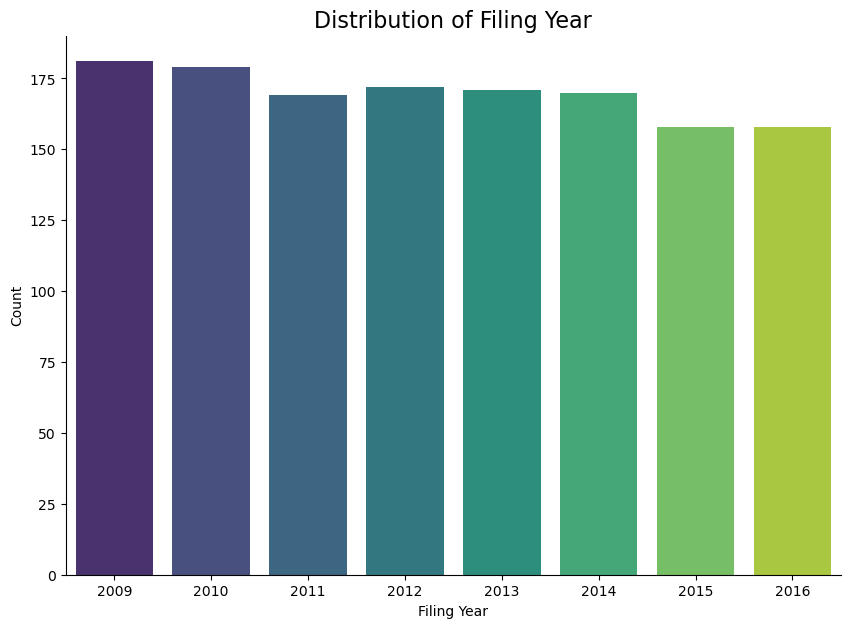

In [56]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Filing Year', palette='viridis')

plt.title('Distribution of Filing Year', fontsize=16)
plt.xlabel('Filing Year')
plt.ylabel('Count')

sns.despine()

plt.show()



## Bivariate Visualizations

### Trend of Total Complaints Over Filing Year for Automobile Insurance Companies

C:\Users\ADMIN\anaconda3\envs\ds-gg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\envs\ds-gg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


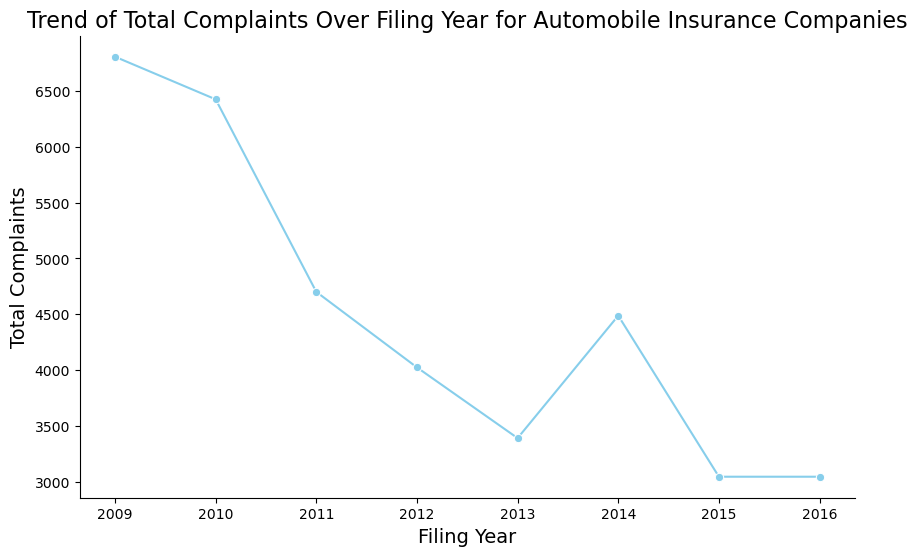

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Filing Year', y='Total Complaints', estimator='sum', errorbar=None, marker='o', color='skyblue')

# Add titles and labels
plt.title('Trend of Total Complaints Over Filing Year for Automobile Insurance Companies', fontsize=16)
plt.xlabel('Filing Year', fontsize=14)
plt.ylabel('Total Complaints', fontsize=14)

sns.despine()

plt.show()

### Top Companies by Total Complaints

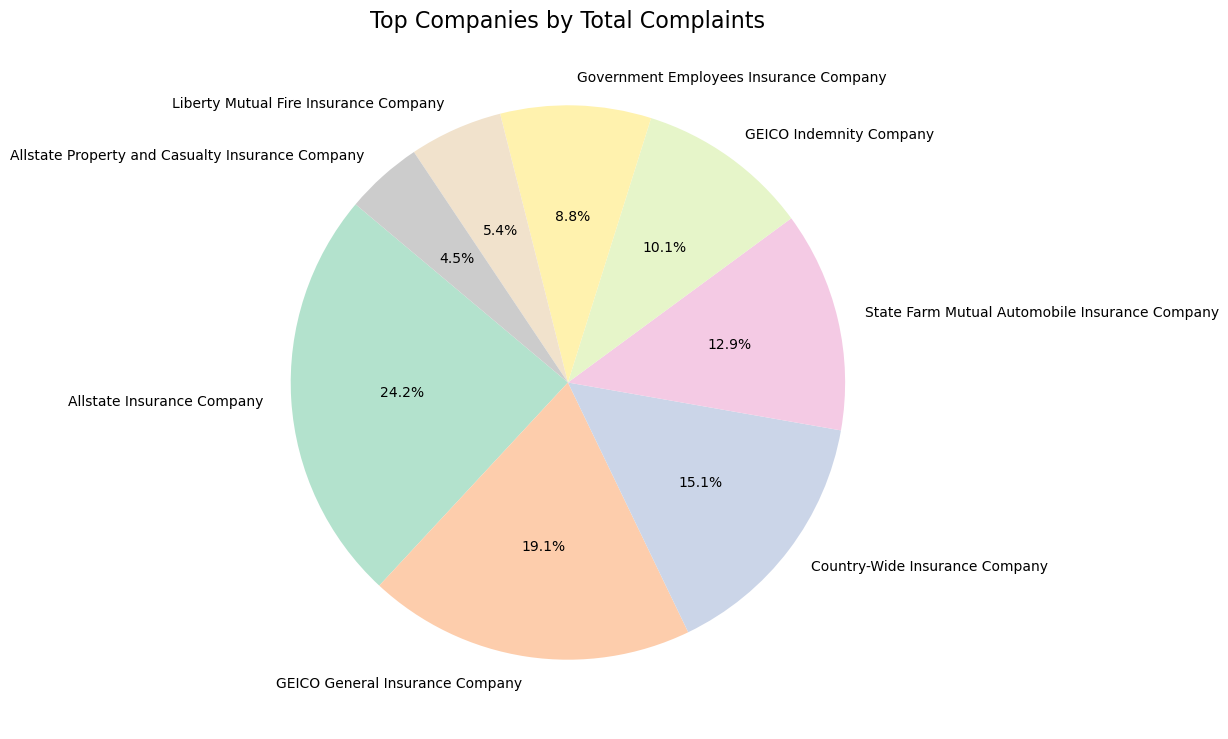

In [75]:
# Calculate the total number of complaints for each company
total_complaints_by_company = df.groupby('Company Name')['Total Complaints'].sum()

# Sort the companies by total complaints and select the top N
top_companies = total_complaints_by_company.sort_values(ascending=False).head(8)  # Adjust '10' to the desired number of top companies

# Create the pie chart
plt.figure(figsize=(12, 9))
plt.pie(top_companies.values, labels=top_companies.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)

# Add title
plt.title('Top Companies by Total Complaints', fontsize=16)

plt.show()

## Multivariate Visualizations

### Distribution of Complaint Types for Automobile Insurance Companies

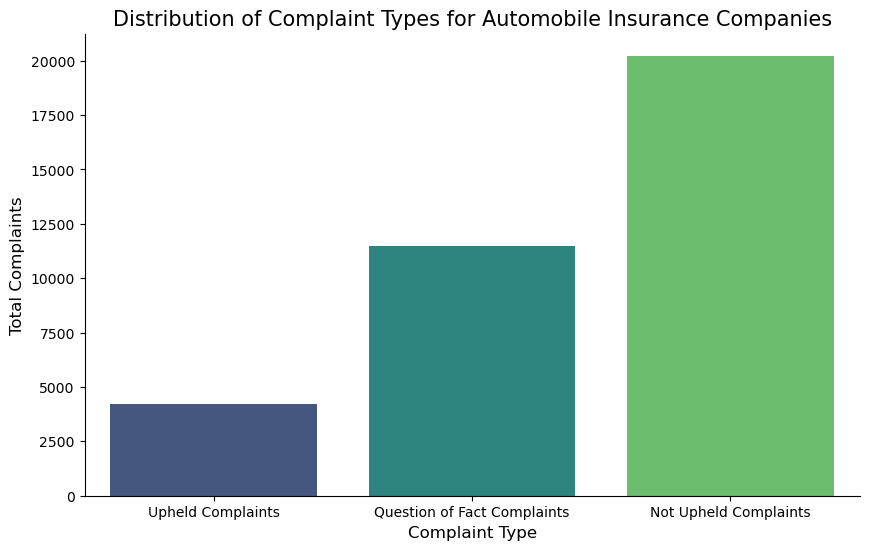

In [64]:
complaint_count = df[['Upheld Complaints', 'Question of Fact Complaints', 'Not Upheld Complaints']].sum()
plt.figure(figsize=(10,6))

#x=complaint_count.index is a code to specify that I want to use the index value of the complaint_count
#similarly, i used y=complaint_count.values to specifically command that values of complaint_count for the bars
sns.barplot(x=complaint_count.index, y=complaint_count.values, palette='viridis')

plt.title('Distribution of Complaint Types for Automobile Insurance Companies', fontsize=15)
plt.xlabel('Complaint Type', fontsize=12)
plt.ylabel('Total Complaints', fontsize=12)

sns.despine()

plt.show()

### Premiums Written by Top 8 Companies Over Filing Years

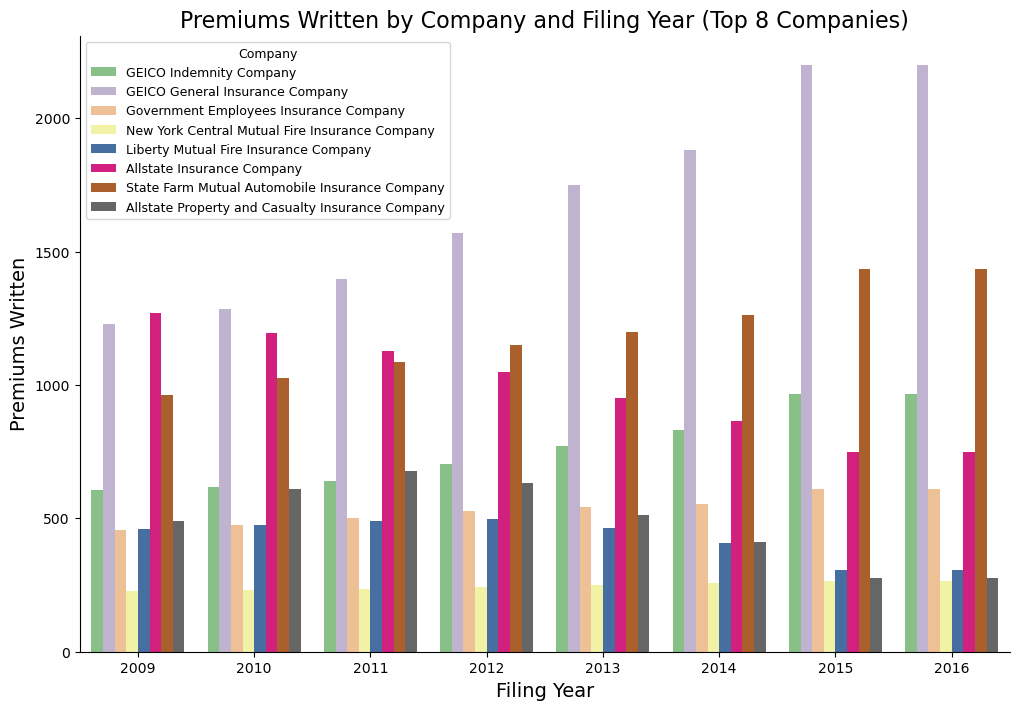

In [99]:
plt.figure(figsize=(12,8))

# Calculate the total premiums written for each company
total_premiums_by_company = df.groupby('Company Name')['Premiums Written (in Millions)'].sum()

# Select the top 8 companies
top_companies = total_premiums_by_company.nlargest(8)

# Filter the DataFrame to include only data for the top 15 companies
df_top_companies = df[df['Company Name'].isin(top_companies.index)]

sns.barplot(data=df_top_companies, x='Filing Year', y='Premiums Written (in Millions)', hue='Company Name', palette='Accent')

plt.title('Premiums Written by Company and Filing Year (Top 8 Companies)', fontsize=16)
plt.xlabel('Filing Year', fontsize=14)
plt.ylabel('Premiums Written', fontsize=14)
plt.legend(title='Company', fontsize=9, title_fontsize=9)
sns.despine()
plt.show()